In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data

In [26]:
df = pd.DataFrame({
    "age": [25, 28, 31, 49, 25, 51, 58, 71, 25, 21],
    "height": [168, 173, 199, 183, 151, 165, 188, 189, 190, 165],
    "result": [0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
})

df.head(2)

,age,height,result
0,25,168,0
1,28,173,1


# Creating some generic helper functions

In [3]:
def prediction(lower_bound, upper_bound):
    y = [num for num in range(lower_bound, upper_bound+1)]
    
    return np.array(y).reshape(-1, 1)

# Logistic Regression

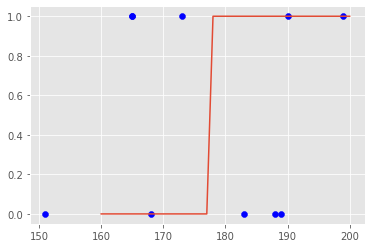

In [4]:
from sklearn.linear_model import LogisticRegression

# Preparing Data
x = df[["height"]]
y = df[["result"]]

predict = prediction(160, 200)

# Creating model
lr = LogisticRegression()
lr.fit(x, y)

# PLotting the Model
plt.scatter(x, y, color = "blue")
plt.plot(predict, lr.predict(predict));

# Decision Tree Classification

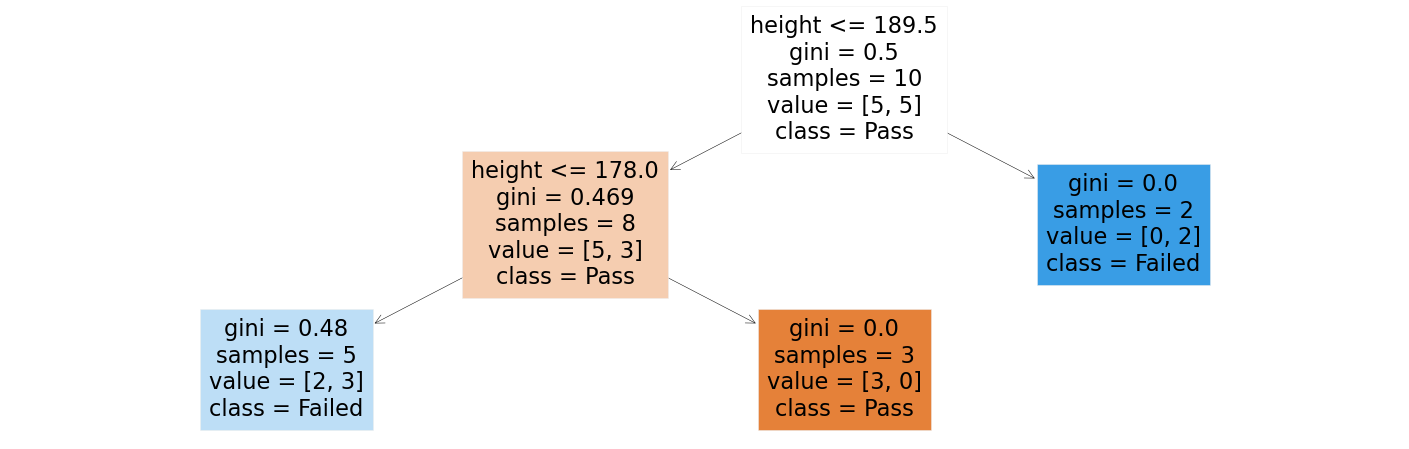

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Preparing Data
x = df[["height", "age"]]
y = df[["result"]]

# Creating Model
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x, y)

# Plotting Trees
fig, ax = plt.subplots(figsize=(25, 8))
plot_tree(clf, ax = ax, feature_names = ["height", "age"], class_names = ["Pass", "Failed"], filled = True);
plt.show()

# Support Vector Machines

Since using Support Vector Machine Algorithm is kinda overfitted for using it on one parameter, we add another parameter with the age of the persons. The SVM-Algorithm tries to create boundaries on which the desired output-value changes. This can be achieved with multiple kernels (see: [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

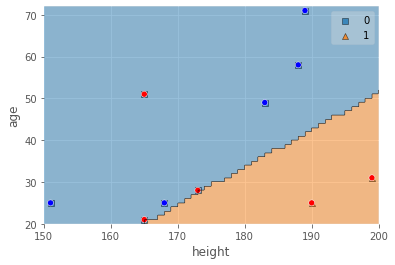

In [13]:
# Preparing Data
x = df[["height", "age"]]
y = df[["result"]]

# Creating Model
clf = svm.SVC(kernel = "linear")
clf.fit(x, y)


# Plotting with mlxtend
# we need to add seaborn scatteprlot to get the real results instead of the predicted results as markers, we get the backgroundcolor as prediction zones
plot_decision_regions(np.array(x), clf.predict(x), clf=clf, legend = 1)
sns.scatterplot(df["height"], df["age"], hue = df["result"], legend = False, palette=["blue", "red"]);

# Naive Bayes Classifier

Naive Bayes is an classification algorithm that is based on bayes theorem. I wont go into detail about the mathematical basics of the theorem (maybe in the theory section later). Since the algorithm works the best with categorical data, we will firstly create a new dataframe and then explain the algorithm by solving it.

In [23]:
df2 = pd.DataFrame({
    "outlook": ["sunny", "sunny", "overcast", "rainy", "rainy", "rainy", "overcast", "sunny", "sunny", "rainy", "sunny", "overcast", "overcast", "rain"],
    "temperature": ["hot", "hot", "hot", "mild", "cold", "cold", "cold", "mild", "cold", "mild", "mild", "mild", "hot", "mild"],
    "play_tennis": ["NO", "NO", "YES", "YES", "YES", "NO", "YES", "NO", "YES", "YES", "YES", "YES", "YES", "NO"]
})

df2.head(3)

,outlook,temperature,play_tennis
0,sunny,hot,NO
1,sunny,hot,NO
2,overcast,hot,YES


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

# preparing Data (we need to transform categorical data to numerical first)
df2["outlook"] = df2["outlook"].factorize()[0]            # 0 = sunny, 1 = overcast, 2 = rainy
df2["temperature"] = df2["temperature"].factorize()[0]    # 0 = hot, 1 = mild, 2 = cold
df2["play_tennis"] = df2["play_tennis"].factorize()[0]    # 0 = NO, 1 = YES

x = df2[["outlook", "temperature"]].copy()
y = df2["play_tennis"].copy()

# # creating Model
clf = GaussianNB()
clf.fit(x, y)

# Testing with the forecast SUNNY HOT:
forecast = np.array([0, 0]).reshape(-1, 2)
result = clf.predict(forecast)[0]

print(result)

0


# K-Nearest Neighbor

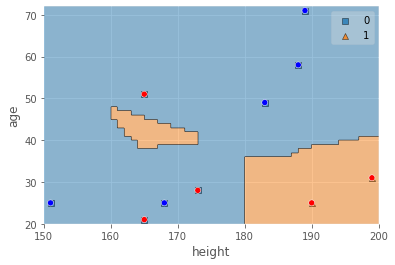

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Preparing Data
x = df[["height", "age"]]
y = df[["result"]]

# Creating model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x, y)

# Plotting with mlxtend
# we need to add seaborn scatteprlot to get the real results instead of the predicted results as markers, we get the backgroundcolor as prediction zones
plot_decision_regions(np.array(x), knn.predict(x), clf=knn, legend = 1)
sns.scatterplot(df["height"], df["age"], hue = df["result"], legend = False, palette=["blue", "red"]);